In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, TensorBoard
from keras.callbacks import LambdaCallback
from keras import backend as K

import tensorflow as tf

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

(55000, 28, 28, 1)
(55000, 10)


In [4]:
batch_x, batch_y = mnist.train.next_batch(batch_size=10)

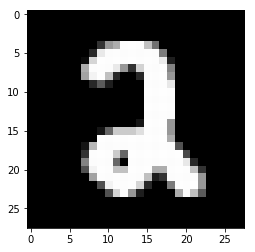

In [5]:
plt.imshow(batch_x[5,:,:,0], cmap='gray')

In [8]:
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(Conv2D(filters=12, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 12)        120       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 12)        1308      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 12)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 12)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                23530     
Total params: 24,958
Trainable params: 24,958
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(mnist.train.images, 
                    mnist.train.labels, 
                    batch_size=32, 
                    epochs=5,
                    validation_data=(mnist.validation.images, mnist.validation.labels),
                    callbacks=[ReduceLROnPlateau(), EarlyStopping(patience=3)]
                   )

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
29408/55000 [===============>..............] - ETA: 15s - loss: 0.3920 - acc: 0.8821